# Description
[Dataset](https://www.kaggle.com/aungpyaeap/supermarket-sales)

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health  and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Acknowledgements

Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

### Purpose

This dataset can be used for predictive data analytics purpose.

# Initial Fase

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import matplotlib.pyplot as plt

# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

# Discovery
## Outlook

In [2]:
raw = pd.read_csv('./Data/supermarket_sales - Sheet1.csv')

In [3]:
raw.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
204,394-43-4238,B,Mandalay,Member,Male,Home and lifestyle,17.77,5,4.4425,93.2925,2/15/2019,12:42,Credit card,88.85,4.761905,4.4425,5.4
878,448-61-3783,A,Yangon,Normal,Female,Electronic accessories,90.02,8,36.0080,756.1680,3/21/2019,16:08,Credit card,720.16,4.761905,36.0080,4.5
592,560-49-6611,A,Yangon,Member,Female,Sports and travel,45.58,1,2.2790,47.8590,2/7/2019,14:13,Cash,45.58,4.761905,2.2790,9.8


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# NaN value
Non sono presenti a prima vista valori mancanti

# Data Exploration and Selection

# Rename columns
Bisogna rinominare le colonne per facilitare il lavoro con esse

In [5]:
raw.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
raw.columns = ['Pc_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_perc', 'gross_income',
       'Rating']

## Check data

In [18]:
for i in raw.columns:
    print(raw[f'{i}'].value_counts())
    print('---')

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Pc_ID, Length: 1000, dtype: int64
---
A    340
B    332
C    328
Name: Branch, dtype: int64
---
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
---
Member    501
Normal    499
Name: Customer_type, dtype: int64
---
Female    501
Male      499
Name: Gender, dtype: int64
---
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64
---
83.77    3
39.62    2
24.74    2
19.15    2
73.47    2
        ..
57.95    1
47.65    1
42.82    1
48.09    1
88.34    1
Name: Unit_price, Length: 943, dtype: int64
---
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtyp

In [10]:
len(raw.Pc_ID.unique())

1000

Pc_ID è sempre riverso per questo motivo non ha nessuna importanza. Si può eliminare

In [19]:
raw['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [14]:
raw['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [16]:
raw['Customer_type'].value_counts()

Member    501
Normal    499
Name: Customer_type, dtype: int64

In [20]:
raw['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [24]:
raw['Product_line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

In [21]:
raw['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [23]:
raw.describe()

,Unit_price,Quantity,Tax,Total,cogs,gross_margin_perc,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [69]:
(raw['Tax']==raw['gross_income']).value_counts()

True    1000
dtype: int64

In [70]:
(raw['Tax']==raw['gross_income']).unique()

array([ True])

In [71]:
raw.corr()

,Unit_price,Quantity,Tax,Total,cogs,gross_margin_perc,gross_income,Rating
Unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross_margin_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


## Considerazioni...
La colonna `gross_margin_perc` non ha senso di essere considerata visto che non varia mai

La colonna `Tax` è direttamente correlata al `Unit_price`, `Quantity`, `Total`, `gross_income`

La colonna `Tax` è esattamente uguale alla colonna `gross_income` per questo non verrà considerata.

# Lavorare con le time series

In [ ]:
# ...

# Prime associazioni
## by Gender

In [50]:
raw.groupby('Customer_type')['Gender'].value_counts().unstack()

Gender,Female,Male
Customer_type,,
Member,261,240
Normal,240,259


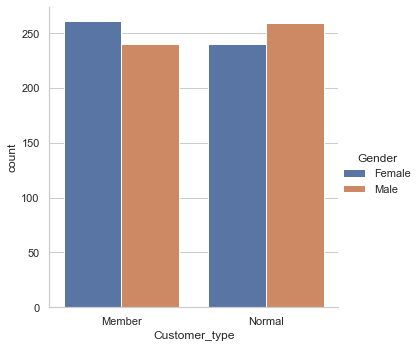

In [51]:
sns.catplot(x='Customer_type', hue='Gender',
            kind='count', data=raw)

In [53]:
raw.groupby('Branch')['Gender'].value_counts().unstack()

Gender,Female,Male
Branch,,
A,161,179
B,162,170
C,178,150


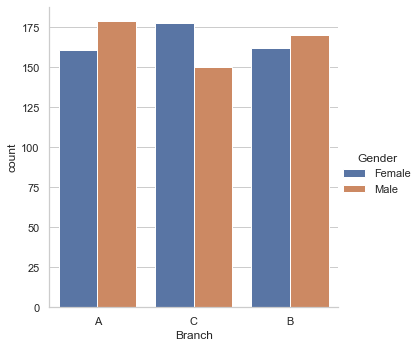

In [52]:
sns.catplot(x='Branch', hue='Gender',
            kind='count', data=raw)

In [56]:
raw.groupby('City')['Gender'].value_counts().unstack()

Gender,Female,Male
City,,
Mandalay,162,170
Naypyitaw,178,150
Yangon,161,179


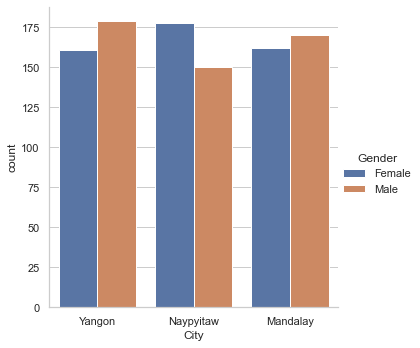

In [57]:
sns.catplot(x='City', hue='Gender',
            kind='count', data=raw)

In [35]:
raw.groupby('Product_line')['Gender'].value_counts().unstack()

Gender,Female,Male
Product_line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

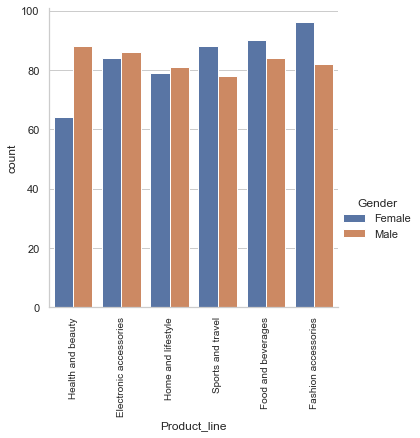

In [59]:
sns.catplot(x='Product_line', hue='Gender',
            kind='count', data=raw)
plt.xticks(rotation=90, fontsize = 10)

In [36]:
raw.groupby('Payment')['Gender'].value_counts().unstack()

Gender,Female,Male
Payment,,
Cash,178,166
Credit card,163,148
Ewallet,160,185


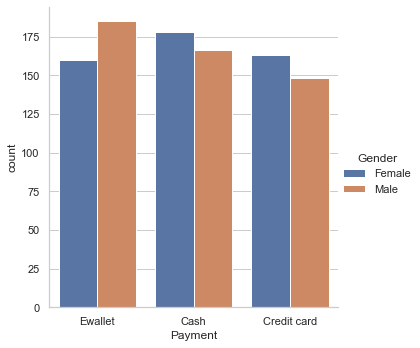

In [60]:
sns.catplot(x='Payment', hue='Gender',
            kind='count', data=raw)

In [48]:
raw.groupby('Quantity')['Gender'].value_counts().unstack()

Gender,Female,Male
Quantity,,
1,45,67
2,44,47
3,41,49
4,55,54
5,56,46
6,50,48
7,49,53
8,42,43
9,56,36


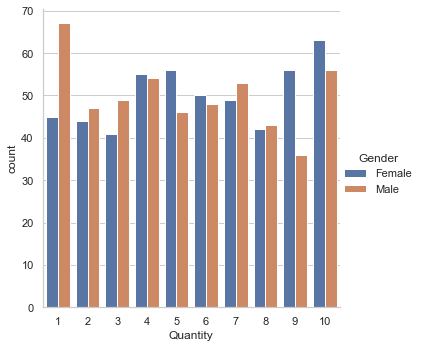

In [49]:
sns.catplot(x='Quantity', hue='Gender',
            kind='count', data=raw)

Text(0.5, 1.0, 'Payment Channel by Gender')

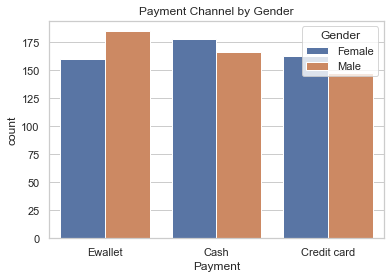

In [45]:
sns.set_theme(style="whitegrid")
sns.countplot(x='Payment',
            hue='Gender',
            data=raw).set_title("Payment Channel by Gender")

In [12]:
raw.sample(10)

,Pc_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross_margin_perc,gross_income,Rating
668,408-66-6712,C,Naypyitaw,Member,Female,Health and beauty,47.71,6,14.3130,300.5730,2/16/2019,14:19,Ewallet,286.26,4.761905,14.3130,4.4
378,595-86-2894,C,Naypyitaw,Member,Male,Fashion accessories,96.98,4,19.3960,407.3160,2/6/2019,17:20,Ewallet,387.92,4.761905,19.3960,9.4
941,702-83-5291,C,Naypyitaw,Member,Male,Fashion accessories,99.82,9,44.9190,943.2990,3/27/2019,10:43,Cash,898.38,4.761905,44.9190,6.6
700,626-43-7888,C,Naypyitaw,Normal,Female,Fashion accessories,60.41,8,24.1640,507.4440,2/7/2019,12:23,Ewallet,483.28,4.761905,24.1640,9.6
346,441-94-7118,A,Yangon,Member,Male,Electronic accessories,71.95,1,3.5975,75.5475,2/4/2019,12:14,Cash,71.95,4.761905,3.5975,7.3
784,516-77-6464,C,Naypyitaw,Member,Female,Health and beauty,10.16,5,2.5400,53.3400,2/24/2019,13:08,Ewallet,50.80,4.761905,2.5400,4.1
825,569-76-2760,A,Yangon,Member,Female,Sports and travel,22.01,4,4.4020,92.4420,1/29/2019,18:15,Credit card,88.04,4.761905,4.4020,6.6
255,110-48-7033,B,Mandalay,Member,Male,Fashion accessories,32.62,4,6.5240,137.0040,1/29/2019,14:12,Cash,130.48,4.761905,6.5240,9.0
782,307-04-2070,A,Yangon,Member,Female,Fashion accessories,30.62,1,1.5310,32.1510,2/5/2019,14:14,Credit card,30.62,4.761905,1.5310,4.1
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.0720,85.5120,3/30/2019,12:51,Credit card,81.44,4.761905,4.0720,9.5
